In [34]:
#必要なライブラリをインポートする
import pandas as pd 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
#ファイルの読み込み
df = pd.read_csv('datafiles/ramen.csv')
df.head(2)

,date,day_week,rain_10,rain_total,arg_temperature,max_temperature,min_temperature,avg_wind,corona_all,corona_chiba,corona_tokyo,customers,sale
0,2021/1/6,Wednesday,0.0,0.0,4.7,6.5,3.4,2.1,6066,343,1640,120.0,96900.0
1,2021/1/7,Thursday,0.5,3.0,6.2,11.6,2.2,3.2,7793,618,2520,113.0,93600.0


In [36]:
#check day of week に何種類があるか
df['day_week'].value_counts()

Wednesday    47
Saturday     47
Tuesday      47
Friday       47
Sunday       47
Monday       47
Thursday     47
Name: day_week, dtype: int64

In [37]:
#ダミー変数化(数値化)
days = pd.get_dummies(df['day_week'], drop_first = True)
df2 = pd.concat([df, days], axis = 1)
df2 = df2.drop(['day_week'], axis = 1)
df2.head(2)

,date,rain_10,rain_total,arg_temperature,max_temperature,min_temperature,avg_wind,corona_all,corona_chiba,corona_tokyo,customers,sale,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2021/1/6,0.0,0.0,4.7,6.5,3.4,2.1,6066,343,1640,120.0,96900.0,0,0,0,0,0,1
1,2021/1/7,0.5,3.0,6.2,11.6,2.2,3.2,7793,618,2520,113.0,93600.0,0,0,0,1,0,0


In [38]:
#訓練データ＆検証データとテストデータに分割する
train_val, test = train_test_split(df2, test_size = 0.2, random_state = 0)

In [39]:
#train_val に欠損値がるかかチェック
train_val.isnull().sum()

date               0
rain_10            0
rain_total         0
arg_temperature    0
max_temperature    0
min_temperature    0
avg_wind           0
corona_all         0
corona_chiba       0
corona_tokyo       0
customers          1
sale               1
Monday             0
Saturday           0
Sunday             0
Thursday           0
Tuesday            0
Wednesday          0
dtype: int64

In [42]:
#金曜日の客数の平均値で埋める
train_val_mean = train_val.mean()
train_val2 = train_val.fillna(train_val_mean)

In [43]:
# null がまだあるかチェック
train_val2.isnull().sum()

date               0
rain_10            0
rain_total         0
arg_temperature    0
max_temperature    0
min_temperature    0
avg_wind           0
corona_all         0
corona_chiba       0
corona_tokyo       0
customers          0
sale               0
Monday             0
Saturday           0
Sunday             0
Thursday           0
Tuesday            0
Wednesday          0
dtype: int64

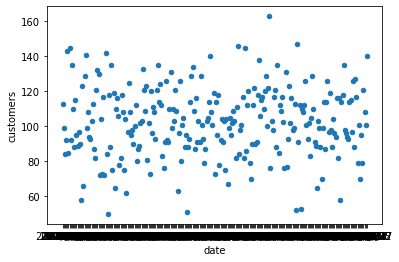

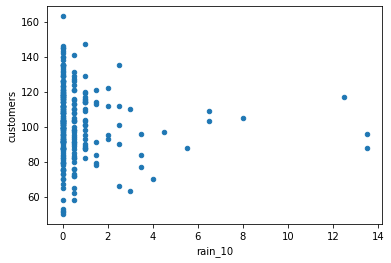

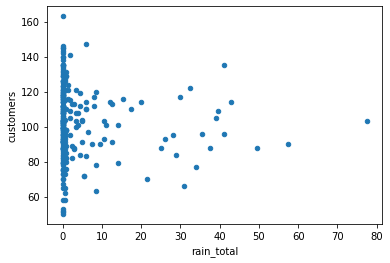

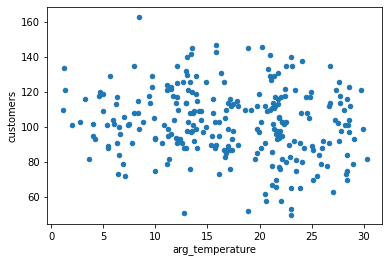

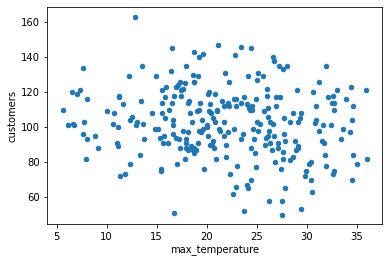

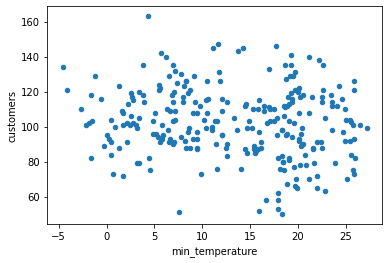

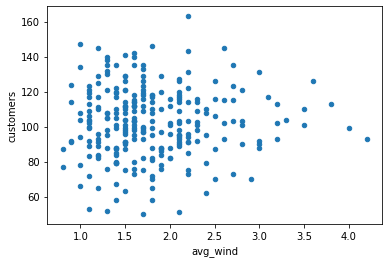

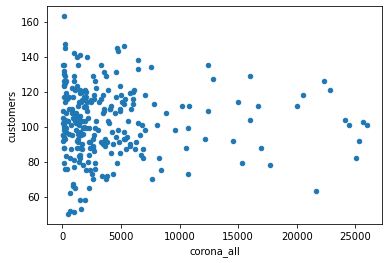

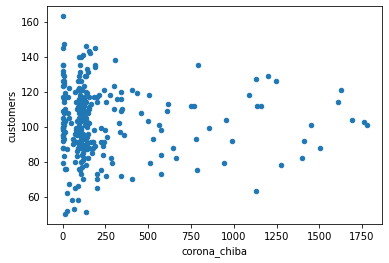

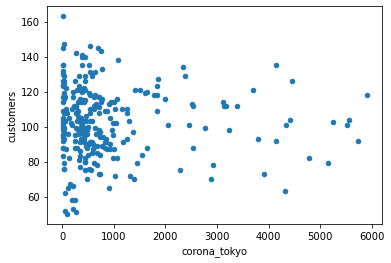

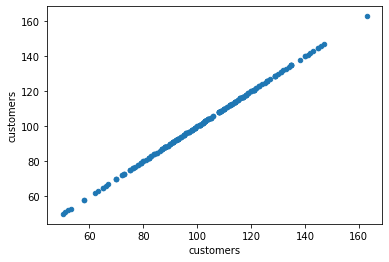

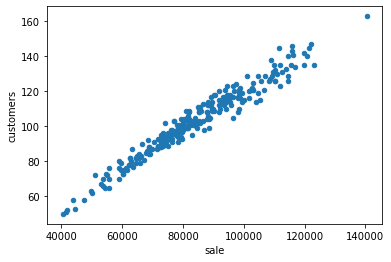

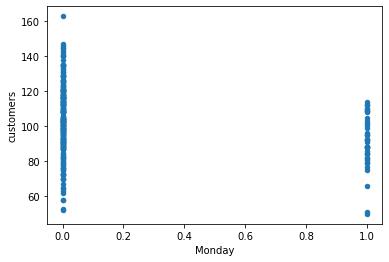

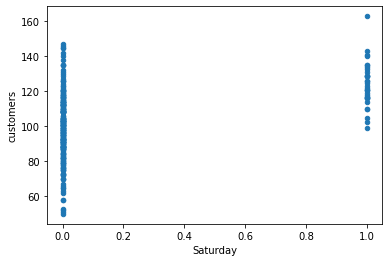

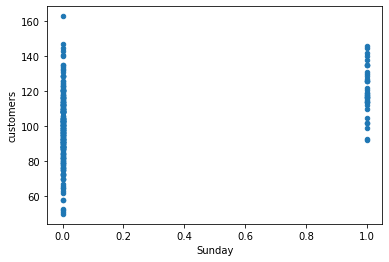

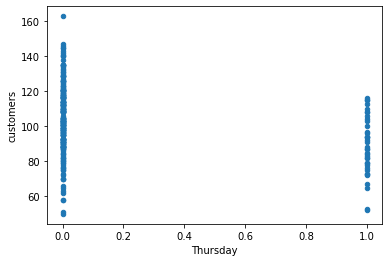

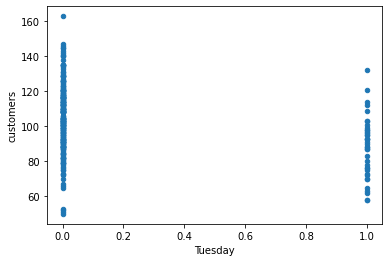

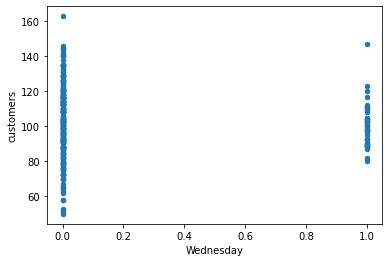

In [44]:
#ok no null 
#外れ値探し
colname = train_val2.columns
for name in colname:
    train_val2.plot(kind = 'scatter', x= name, y='customers')

In [45]:
#rain_10の外れ値
out_line1 = train_val2[(train_val2['rain_10']>10)].index

# rain_total の外れ値
out_line2 = train_val2[train_val2['rain_total']>70].index
print(out_line1, out_line2)

Int64Index([229, 178, 177], dtype='int64') Int64Index([103], dtype='int64')


In [46]:
#　外れ値を削除
train_val3 = train_val2.drop([103,177,178,229], axis = 0)

In [47]:
#絞り込んだ列以外を取り除く
col = ['rain_10','rain_total','arg_temperature', 'avg_wind','corona_all','corona_chiba','Monday','Tuesday','Wednesday','Thursday','Saturday']
train_val4 = train_val3[col]
train_val4.head(3)

,rain_10,rain_total,arg_temperature,avg_wind,corona_all,corona_chiba,Monday,Tuesday,Wednesday,Thursday,Saturday
1,0.5,3.0,6.2,3.2,7793,618,0,0,0,1,0
289,0.0,0.0,11.2,1.8,345,5,0,0,0,0,0
8,0.0,0.0,6.5,1.2,6749,576,0,0,0,1,0
